In [1]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt

nltk.download(['stopwords', 'punkt', 'wordnet'])
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer

from wordcloud import WordCloud

from sklearn.cluster import KMeans

from gensim.models import Word2Vec

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhairyapatel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dhairyapatel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dhairyapatel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
sentences = [
    'In the past John liked only sport but now he likes sport and politics',
    'Sam only liked politics but now he is fan of both music and politics',
    'Sara likes both books and politics but in the past she only read books',
    'Robert loved both books and nature but now he only reads books',
    'Linda liked books and sport but she only likes sport now',
    'Alison used to loved nature but currently she likes both nature and sport'
]

corpus = []

for sentence in sentences:
    sentence = sentence.lower()
    words = word_tokenize(sentence)
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    words = [lemmatizer.lemmatize(word.lower()) for word in words]
    sentence = ' '.join(words)
    corpus.append(sentence)
    
print(corpus)

['past john like sport like sport polit', 'sam like polit fan music polit', 'sara like book polit past read book', 'robert love book natur read book', 'linda like book sport like sport', 'alison use love natur current like natur sport']


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer(use_idf=False, norm='l1')

tf = vectorizer.fit_transform(corpus)

print('List of Features:')
print('-----------------------------------------')
print(vectorizer.get_feature_names_out())

print()
print('Tf Document-Term Matrix:')
df = pd.DataFrame(tf.toarray(), columns=vectorizer.get_feature_names_out())
print(df)


List of Features:
-----------------------------------------
['alison' 'book' 'current' 'fan' 'john' 'like' 'linda' 'love' 'music'
 'natur' 'past' 'polit' 'read' 'robert' 'sam' 'sara' 'sport' 'use']

Tf Document-Term Matrix:
   alison      book  current       fan      john      like     linda  \
0   0.000  0.000000    0.000  0.000000  0.142857  0.285714  0.000000   
1   0.000  0.000000    0.000  0.166667  0.000000  0.166667  0.000000   
2   0.000  0.285714    0.000  0.000000  0.000000  0.142857  0.000000   
3   0.000  0.333333    0.000  0.000000  0.000000  0.000000  0.000000   
4   0.000  0.166667    0.000  0.000000  0.000000  0.333333  0.166667   
5   0.125  0.000000    0.125  0.000000  0.000000  0.125000  0.000000   

       love     music     natur      past     polit      read    robert  \
0  0.000000  0.000000  0.000000  0.142857  0.142857  0.000000  0.000000   
1  0.000000  0.166667  0.000000  0.000000  0.333333  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.142857  0.1

/Users/dhairyapatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhairyapatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhairyapatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhairyapatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

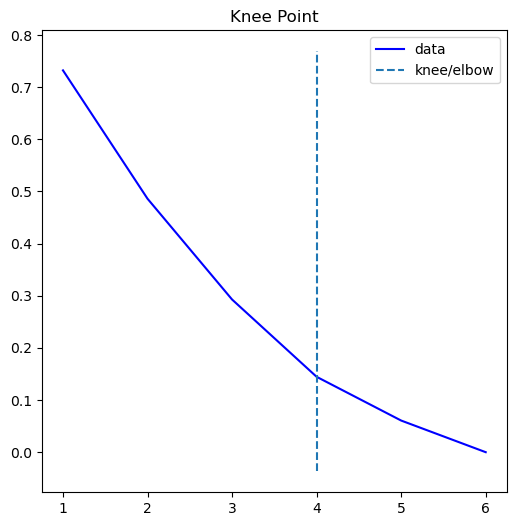

In [15]:
from kneed import KneeLocator

sse_scores = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=5, max_iter=1000)
    kmeans.fit(df)
    sse_scores.append(kmeans.inertia_)

kl = KneeLocator(range(1,7), sse_scores, curve="convex", direction="decreasing")
kl.plot_knee()
    

In [17]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming `corpus` is defined and contains your text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=5, max_iter=1000)
kmeans.fit(X)

words = vectorizer.get_feature_names_out()

# This loop transforms the numbers back into words
common_words = kmeans.cluster_centers_.argsort()[:, -1:-19:-1]
word_clusters = []
for num, centroid in enumerate(common_words):
    cluster = ', '.join(words[word] for word in centroid)
    word_clusters.append(cluster)
    print(str(num) + ' : ' + cluster)


0 : sport, like, linda, john, past, book, polit, use, current, fan, music, love, natur, read, robert, sam, sara, alison
1 : book, read, robert, sara, natur, love, past, polit, like, use, john, current, fan, music, linda, sport, sam, alison
2 : polit, music, sam, fan, like, love, book, current, john, linda, use, sport, natur, past, read, robert, sara, alison
3 : natur, use, current, alison, love, sport, like, robert, read, polit, past, sam, linda, john, fan, sara, book, music


Cluster: 0
-----------------------------------------------------


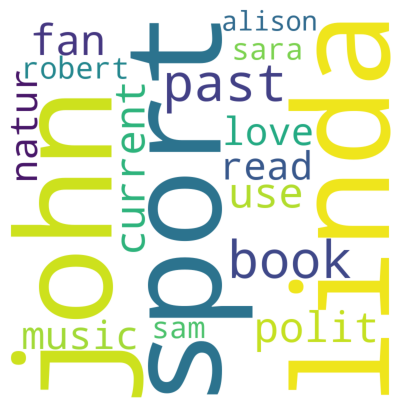

Cluster: 1
-----------------------------------------------------


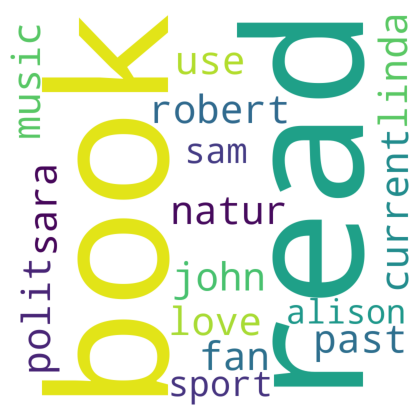

Cluster: 2
-----------------------------------------------------


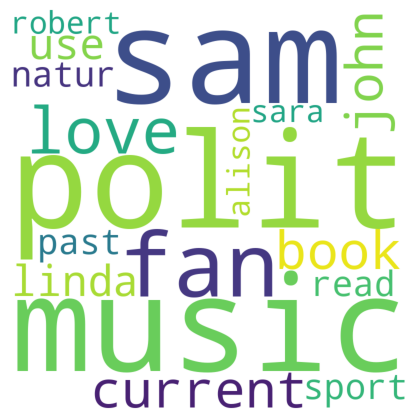

Cluster: 3
-----------------------------------------------------


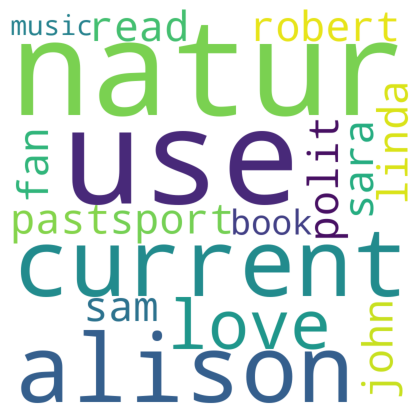

In [18]:
for i in range(4):
    print(f'Cluster: {i}')
    print('-----------------------------------------------------')
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(word_clusters[i])

    # plot the WordCloud image                      
    plt.figure(figsize = (4, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

corpus = [
    'past john like sport like sport polit', 
    'sam like polit fan music polit', 
    'sara like book polit past read book', 
    'robert love book natur read book', 
    'linda like book sport like sport', 
    'alison use love natur current like natur sport',
]

vectorizer = TfidfVectorizer(norm='l2')
tfidf = vectorizer.fit_transform(corpus)

print('List of Features:')
print('-----------------------------------------')
print(vectorizer.get_feature_names_out())

print()
print('Tf Document-Term Matrix:')
df = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names_out())
print(df)


List of Features:
-----------------------------------------
['alison' 'book' 'current' 'fan' 'john' 'like' 'linda' 'love' 'music'
 'natur' 'past' 'polit' 'read' 'robert' 'sam' 'sara' 'sport' 'use']

Tf Document-Term Matrix:
    alison      book  current       fan      john      like     linda  \
0  0.00000  0.000000  0.00000  0.000000  0.441993  0.452889  0.000000   
1  0.00000  0.000000  0.00000  0.439389  0.000000  0.225111  0.000000   
2  0.00000  0.618987  0.00000  0.000000  0.000000  0.229032  0.000000   
3  0.00000  0.623322  0.00000  0.000000  0.000000  0.000000  0.000000   
4  0.00000  0.328320  0.00000  0.000000  0.000000  0.485929  0.474237   
5  0.37519  0.000000  0.37519  0.000000  0.000000  0.192220  0.000000   

       love     music     natur      past     polit      read    robert  \
0  0.000000  0.000000  0.000000  0.362440  0.305997  0.000000  0.000000   
1  0.000000  0.439389  0.000000  0.000000  0.608389  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.3665

/Users/dhairyapatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhairyapatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhairyapatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhairyapatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

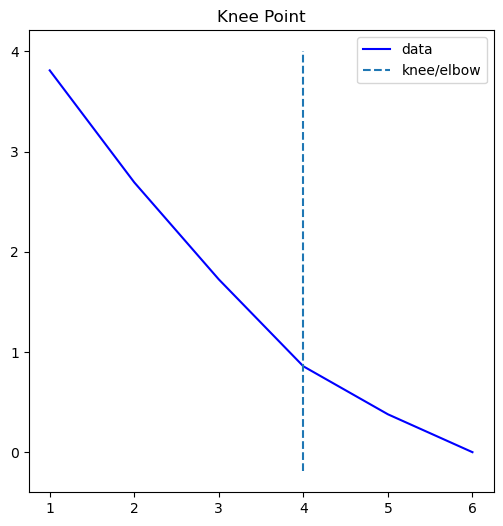

In [21]:
from kneed import KneeLocator

sse_scores = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=5, max_iter=1000)
    kmeans.fit(df)
    sse_scores.append(kmeans.inertia_)

kl = KneeLocator(range(1,7), sse_scores, curve="convex", direction="decreasing", S=0.85)
kl.plot_knee()

In [23]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

corpus = [
    'past john like sport like sport polit', 
    'sam like polit fan music polit', 
    'sara like book polit past read book', 
    'robert love book natur read book', 
    'linda like book sport like sport', 
    'alison use love natur current like natur sport',
]

vectorizer = TfidfVectorizer(norm='l2')
tfidf = vectorizer.fit_transform(corpus)

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=5, max_iter=1000)
kmeans.fit(tfidf)

words = vectorizer.get_feature_names_out()

# This loop prints the top words for each cluster
common_words = kmeans.cluster_centers_.argsort()[:, ::-1]
word_clusters = []
for num, centroid in enumerate(common_words):
    cluster = ', '.join(words[word] for word in centroid[:10])  # Print top 10 words
    word_clusters.append(cluster)
    print(f'Cluster {num}: {cluster}')


Cluster 0: sport, like, linda, john, past, book, polit, use, current, fan
Cluster 1: book, read, robert, sara, natur, love, past, polit, like, use
Cluster 2: polit, music, sam, fan, like, love, book, current, john, linda
Cluster 3: natur, use, current, alison, love, sport, like, robert, read, polit


Cluster: 0
-----------------------------------------------------


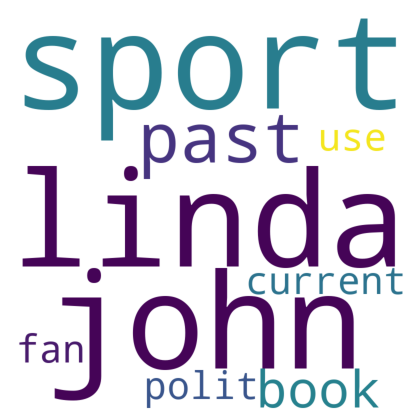

Cluster: 1
-----------------------------------------------------


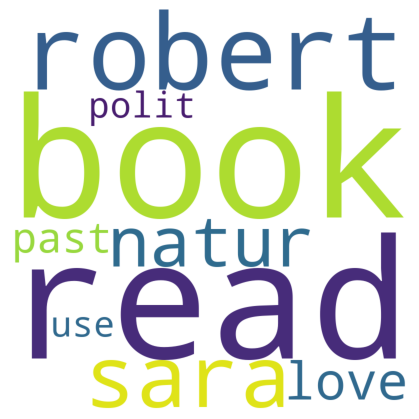

Cluster: 2
-----------------------------------------------------


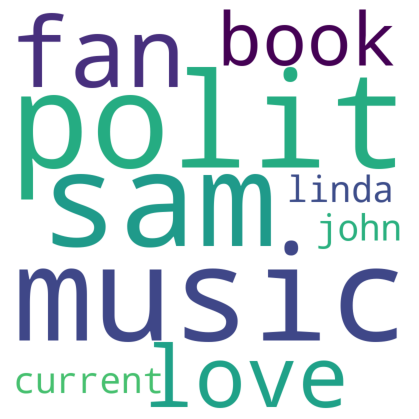

Cluster: 3
-----------------------------------------------------


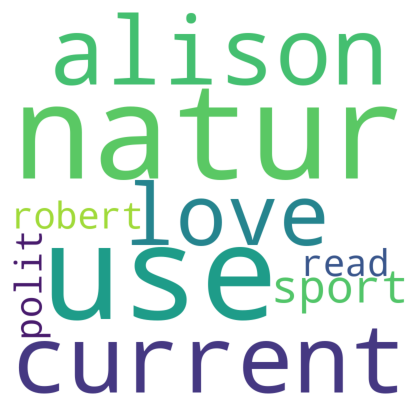

In [24]:
for i in range(4):
    print(f'Cluster: {i}')
    print('-----------------------------------------------------')
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(word_clusters[i])

    # plot the WordCloud image                      
    plt.figure(figsize = (4, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

corpus = [
    'past john like sport like sport polit', 
    'sam like polit fan music polit', 
    'sara like book polit past read book', 
    'robert love book natur read book', 
    'linda like book sport like sport', 
    'alison use love natur current like natur sport',
]

vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(corpus)

print('List of Features:')
print('-----------------------------------------')
print(vectorizer.get_feature_names_out())

print()
print('BoW Document-Term Matrix:')
df = pd.DataFrame(bow.toarray(), columns=vectorizer.get_feature_names_out())
print(df)


List of Features:
-----------------------------------------
['alison' 'book' 'current' 'fan' 'john' 'like' 'linda' 'love' 'music'
 'natur' 'past' 'polit' 'read' 'robert' 'sam' 'sara' 'sport' 'use']

BoW Document-Term Matrix:
   alison  book  current  fan  john  like  linda  love  music  natur  past  \
0       0     0        0    0     1     2      0     0      0      0     1   
1       0     0        0    1     0     1      0     0      1      0     0   
2       0     2        0    0     0     1      0     0      0      0     1   
3       0     2        0    0     0     0      0     1      0      1     0   
4       0     1        0    0     0     2      1     0      0      0     0   
5       1     0        1    0     0     1      0     1      0      2     0   

   polit  read  robert  sam  sara  sport  use  
0      1     0       0    0     0      2    0  
1      2     0       0    1     0      0    0  
2      1     1       0    0     1      0    0  
3      0     1       1    0     0   

/Users/dhairyapatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhairyapatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhairyapatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhairyapatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

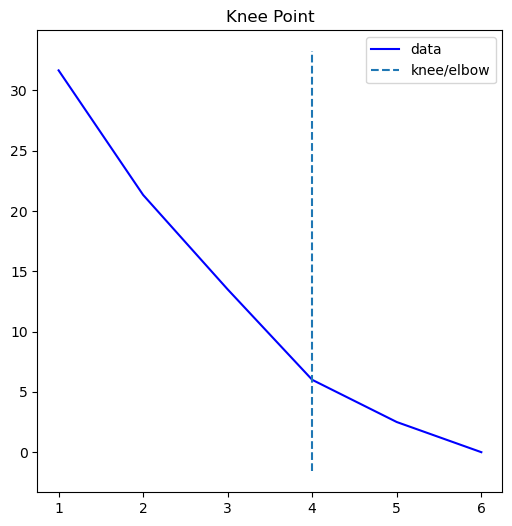

In [29]:
from kneed import KneeLocator

sse_scores = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=5, max_iter=1000)
    kmeans.fit(df)
    sse_scores.append(kmeans.inertia_)

kl = KneeLocator(range(1,7), sse_scores, curve="convex", direction="decreasing")
kl.plot_knee()

In [30]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

corpus = [
    'past john like sport like sport polit', 
    'sam like polit fan music polit', 
    'sara like book polit past read book', 
    'robert love book natur read book', 
    'linda like book sport like sport', 
    'alison use love natur current like natur sport',
]

vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(corpus)

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=5, max_iter=1000)
kmeans.fit(bow)

words = vectorizer.get_feature_names_out()

# This loop prints the top words for each cluster
common_words = kmeans.cluster_centers_.argsort()[:, ::-1]
word_clusters = []
for num, centroid in enumerate(common_words):
    cluster = ', '.join(words[word] for word in centroid[:10])  # Print top 10 words
    word_clusters.append(cluster)
    print(f'Cluster {num}: {cluster}')


Cluster 0: polit, music, sam, fan, like, love, book, current, john, linda
Cluster 1: book, read, sara, robert, polit, past, natur, love, like, use
Cluster 2: like, sport, linda, book, john, polit, past, use, current, fan
Cluster 3: natur, use, current, like, love, sport, alison, past, polit, read


Cluster: 0
-----------------------------------------------------


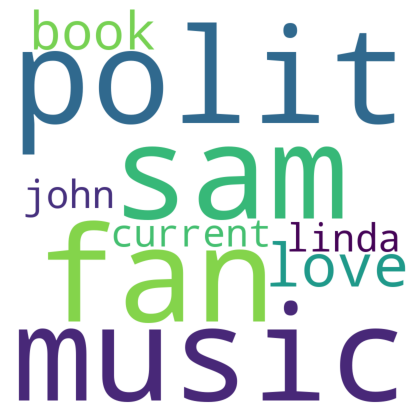

Cluster: 1
-----------------------------------------------------


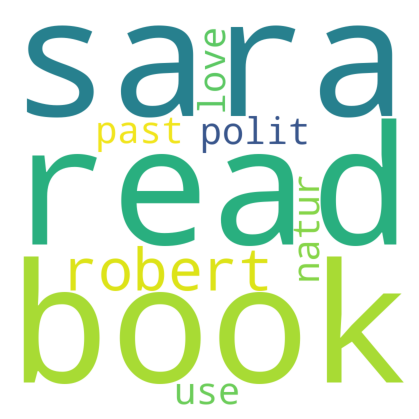

Cluster: 2
-----------------------------------------------------


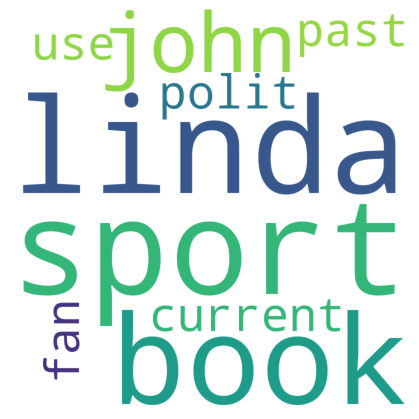

Cluster: 3
-----------------------------------------------------


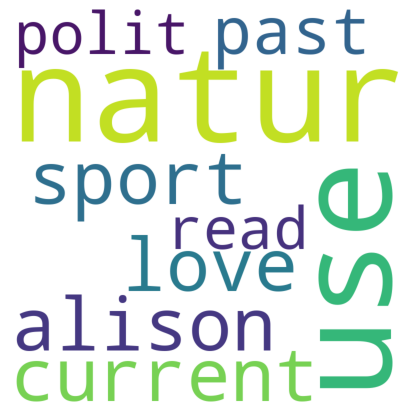

In [31]:
for i in range(4):
    print(f'Cluster: {i}')
    print('-----------------------------------------------------')
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(word_clusters[i])

    # plot the WordCloud image                      
    plt.figure(figsize = (4, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [34]:
from gensim.models import Word2Vec
import pandas as pd

corpus = [
    'past john like sport like sport polit', 
    'sam like polit fan music polit', 
    'sara like book polit past read book', 
    'robert love book natur read book', 
    'linda like book sport like sport', 
    'alison use love natur current like natur sport',
]

# Split each sentence in the corpus into words
w2v_corpus = [sent.split() for sent in corpus]

# Create Word2Vec model
model = Word2Vec(w2v_corpus, vector_size=12, window=3, min_count=0)

# Get the ordered list of words in the vocabulary
words = model.wv.key_to_index.keys()

# Create a dictionary of word vectors
w2vec = {word: model.wv[word] for word in words}

# Create DataFrame from the word vectors
df = pd.DataFrame(w2vec).T
print(df)


               0         1         2         3         4         5         6   \
like    -0.004402  0.001999  0.042448  0.075092 -0.077549 -0.059272  0.053844   
sport   -0.037779  0.054632 -0.040522 -0.015130  0.023953  0.008278 -0.069049   
book     0.052924 -0.028378 -0.007887  0.048071 -0.062680 -0.032801 -0.062597   
polit    0.067312 -0.049424  0.000376 -0.039614 -0.080030  0.041727 -0.072997   
natur    0.041584  0.076993 -0.068145  0.037374 -0.034512  0.006952  0.070815   
past    -0.013130  0.002690 -0.034553 -0.064037 -0.012588  0.020603 -0.007382   
love    -0.012063 -0.076700  0.036344  0.004744  0.061983 -0.006732 -0.022003   
read    -0.047526  0.015488  0.050723 -0.039986 -0.025886  0.056639  0.013615   
fan     -0.074304 -0.058676  0.007501  0.053279 -0.071835  0.030551  0.043257   
john    -0.023660 -0.051441 -0.003422 -0.069746 -0.046668  0.059207  0.027933   
sam      0.019587 -0.037653  0.069877 -0.082148  0.056372  0.024293 -0.041103   
current -0.004994 -0.047464 

/Users/dhairyapatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhairyapatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhairyapatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/dhairyapatel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

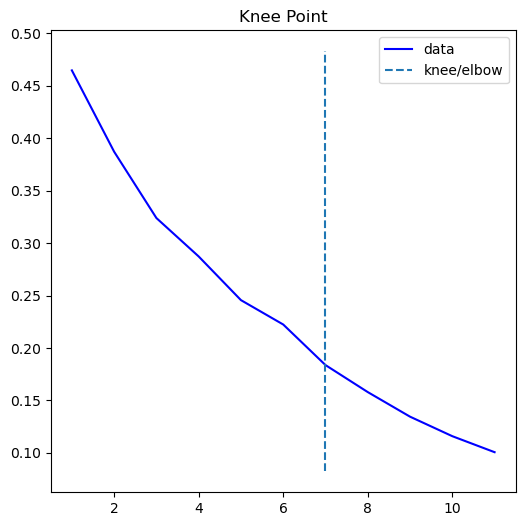

In [35]:
from kneed import KneeLocator

sse_scores = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=5, max_iter=1000)
    kmeans.fit(df)
    sse_scores.append(kmeans.inertia_)

kl = KneeLocator(range(1,12), sse_scores, curve="convex", direction="decreasing")
kl.plot_knee()

In [36]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
import pandas as pd

corpus = [
    'past john like sport like sport polit', 
    'sam like polit fan music polit', 
    'sara like book polit past read book', 
    'robert love book natur read book', 
    'linda like book sport like sport', 
    'alison use love natur current like natur sport',
]

# Create the CountVectorizer
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(corpus)

# Create the KMeans model and fit the document-term matrix
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=5, max_iter=1000)
kmeans.fit(bow)

# Get the feature names (words) from the CountVectorizer
words = vectorizer.get_feature_names_out()

# Create a Word2Vec model
w2v_corpus = [sent.split() for sent in corpus]
model = Word2Vec(w2v_corpus, vector_size=12, window=3, min_count=0)

# Transform the cluster centers into words using the CountVectorizer feature names
common_words = kmeans.cluster_centers_.argsort()[:, ::-1]
word_clusters = []
for num, centroid in enumerate(common_words):
    cluster = ', '.join(words[word] for word in centroid[:10])  # Print top 10 words
    word_clusters.append(cluster)
    print(f'Cluster {num}: {cluster}')


Cluster 0: polit, music, sam, fan, like, love, book, current, john, linda
Cluster 1: book, read, sara, robert, polit, past, natur, love, like, use
Cluster 2: like, sport, linda, book, john, polit, past, use, current, fan
Cluster 3: natur, use, current, like, love, sport, alison, past, polit, read


Cluster: 0
-----------------------------------------------------


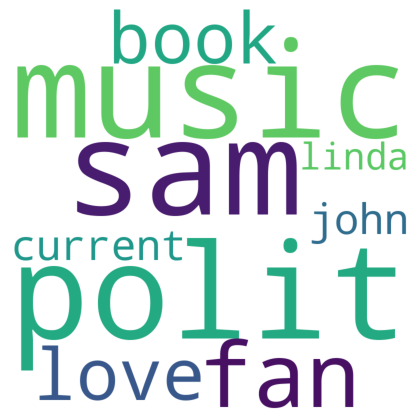

Cluster: 1
-----------------------------------------------------


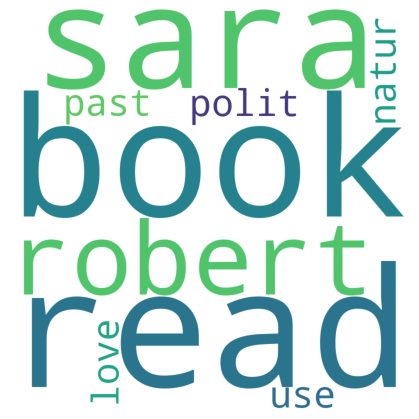

Cluster: 2
-----------------------------------------------------


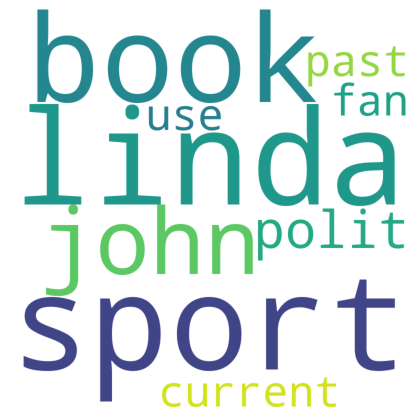

Cluster: 3
-----------------------------------------------------


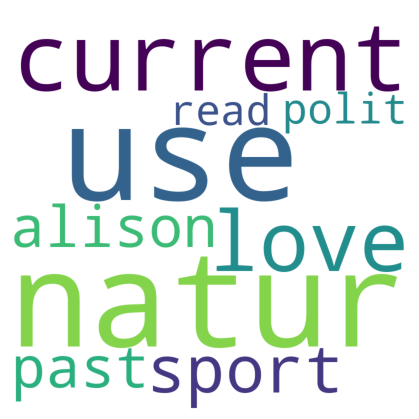

In [37]:
for i in range(4):
    print(f'Cluster: {i}')
    print('-----------------------------------------------------')
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(word_clusters[i])

    # plot the WordCloud image                      
    plt.figure(figsize = (4, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()